<a href="https://colab.research.google.com/github/keltonlee/signal/blob/master/b0829054_hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
# Exercise 1
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

In [ ]:
from thinkdsp import read_wave

wave = read_wave('92002__jcveliz__violin-origional.wav')
wave.normalize()
wave.make_audio()

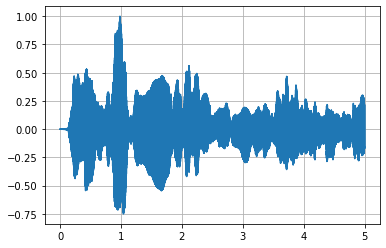

In [ ]:
import matplotlib.pyplot as pl
pl.grid()
wave.plot()

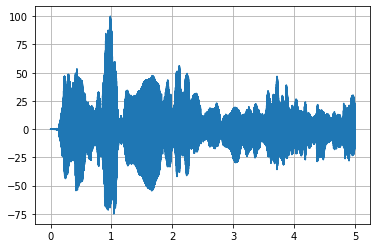

In [ ]:
wave.normalize(amp=100)
wave.plot()
pl.grid()

In [ ]:
segment = wave.segment(start=1.1, duration=0.4)
segment.make_audio()

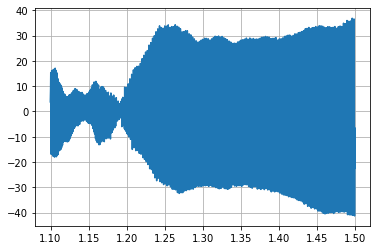

In [ ]:
segment.plot()
pl.grid()

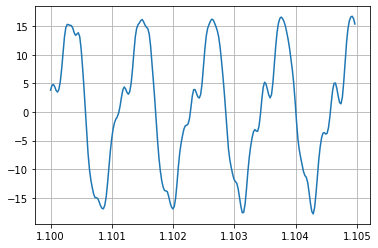

In [ ]:
segment.segment(start=1.1, duration=0.005).plot()
pl.grid()

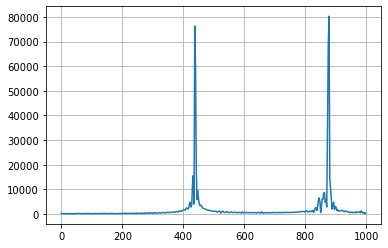

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)
pl.grid()

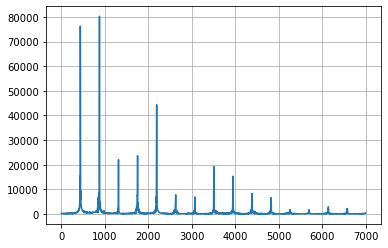

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)
pl.grid()

In [ ]:
spectrum.peaks()[:30]

[(80298.05775330807, 877.5),
 (76284.3432906363, 437.5),
 (68335.79693964253, 875.0),
 (59205.74424881888, 440.0),
 (44329.774373064836, 2192.5),
 (33420.253215310106, 872.5),
 (24936.78584766281, 2190.0),
 (23643.95397517237, 1752.5),
 (23446.71670139115, 1755.0),
 (21985.559807281326, 1315.0),
 (19191.37027934556, 3507.5),
 (18545.04944098854, 2195.0),
 (17257.060142409948, 442.5),
 (16407.36659312429, 2187.5),
 (15580.436648619256, 432.5),
 (15345.61033602802, 3947.5),
 (14294.068344158593, 880.0),
 (13656.159077926393, 3945.0),
 (13220.076307373689, 1312.5),
 (11679.050931417863, 430.0),
 (11090.93576585026, 2197.5),
 (10526.316145328554, 882.5),
 (10103.930419764201, 3510.0),
 (9949.988676608617, 1750.0),
 (9392.989353790828, 447.5),
 (9313.604888025367, 3502.5),
 (9251.94127845219, 3950.0),
 (9051.038399387053, 3505.0),
 (8647.101434398952, 862.5),
 (8496.86937875298, 860.0)]

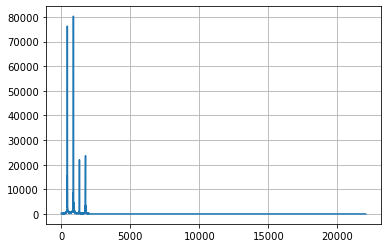

In [ ]:
spectrum.low_pass(cutoff=2000, factor=0.001)  #factor 抑制99%
spectrum.plot()
pl.grid()
spectrum.make_wave().make_audio()

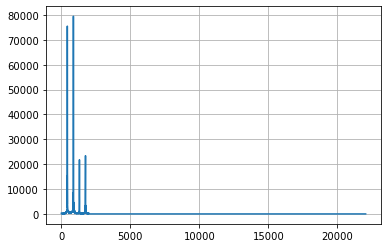

In [ ]:
spectrum.high_pass(cutoff=2000, factor=0.99)
spectrum.plot()
pl.grid()
spectrum.make_wave().make_audio()

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff, factor):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff,factor)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100), factor=(0, 1, 0.001));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

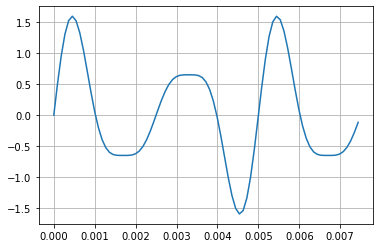

In [ ]:
# Exercise 2
from thinkdsp import SinSignal

signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))
signal.plot()
pl.grid()

In [ ]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

In [ ]:
wave2.make_audio()

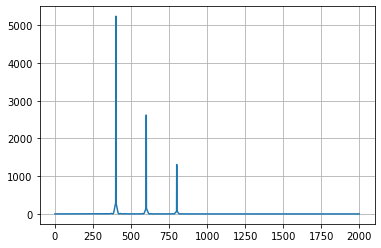

In [ ]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)
pl.grid()

In [ ]:
signal.make_wave().make_audio()

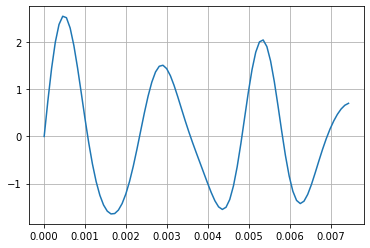

In [ ]:
signal += SinSignal(freq=450)
signal.plot()
pl.grid()
signal.make_wave().make_audio()

In [ ]:
# Exercise 3

wave3 = read_wave('92002__jcveliz__violin-origional.wav')
wave3.normalize()
wave3.make_audio()

In [ ]:
print(wave3.ts)
print(wave3.framerate)

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 4.99993197e+00
 4.99995465e+00 4.99997732e+00]
44100


In [ ]:
def stretch(wave, factor):
    wave.ts *= factor  # ts 是 numpy 的 array，裝的是取樣時間
    wave.framerate /= factor   # framerate 是每秒幾幀(frame)，或說是每秒幾個取樣

In [ ]:
stretch(wave3, 2)
wave3.make_audio()

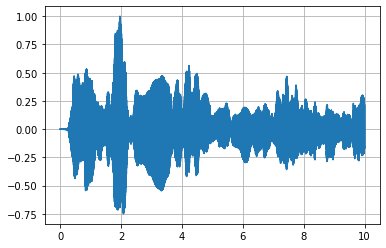

In [ ]:
wave3.plot()
pl.grid()

In [ ]:
print(wave3.ts)
print(wave3.framerate)

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 9.99986395e+00
 9.99990930e+00 9.99995465e+00]
22050.0
